In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df9 = pd.read_csv("../trigger/case9_stats_history.csv")
df10 = pd.read_csv("../trigger/case10_stats_history.csv")
df11 = pd.read_csv("../trigger/case11_stats_history.csv")
df12 = pd.read_csv("../trigger/case12_stats_history.csv")
df13 = pd.read_csv("../trigger/case13_stats_history.csv")
df14 = pd.read_csv("../trigger/case14_stats_history.csv")

In [6]:
df = [df9, df10, df11, df12, df13, df14]
col = ["Total Average Response Time", "Total Min Response Time", "Total Max Response Time"]
df_plot = pd.DataFrame(columns = ["Response Time", "User Count"])
for df_tmp in df:
    user_cnt = df_tmp["User Count"].iloc[-1]
    df_tmp = df_tmp[col].iloc[[-1],:]
    df_tmp.index = ["Response Time"]
    df_tmp = df_tmp.transpose().reset_index(drop = True)
    df_tmp["User Count"] = user_cnt
    df_plot = pd.concat((df_plot, df_tmp))

/var/folders/1y/c37lmtr53c92dcdgqfyzl59w0000gn/T/ipykernel_1225/4143572339.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_plot = pd.concat((df_plot, df_tmp))


In [43]:
df_plot1 = df_plot.copy()
df_plot1["Architecture"] = "Federated"
df_plot2 = df_plot.copy()
df_plot2["Architecture"] = "Centralized"
df_plot3 = df_plot.copy()
df_plot3["Architecture"] = "Decentralized"
df_plot_group = pd.concat((df_plot1, df_plot2, df_plot3))

In [ ]:
plt.errorbar

<Axes: xlabel='User Count', ylabel='Response Time'>

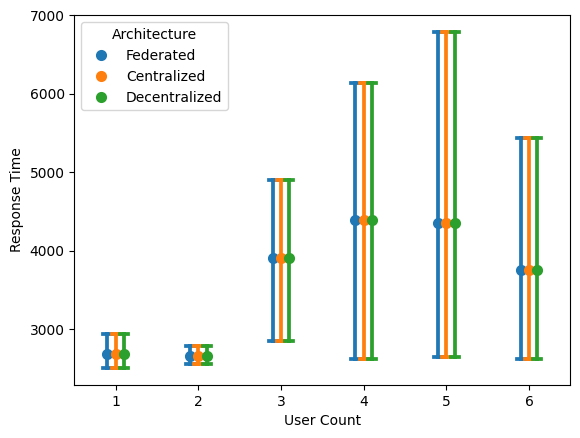

In [44]:
sns.pointplot(
    data=df_plot_group, 
    x="User Count", 
    y="Response Time", 
    hue="Architecture",
    linestyle='', dodge=.2, capsize=.1,
    marker=".", markersize=10, markeredgewidth=3)

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [74]:
sns.set_theme(
    context="paper",
#     style="white",
#     palette=sns.color_palette("Set1", 9, 0.9),
)
palette = sns.color_palette("BrBG", 6, 1)

In [75]:
dirpath = "/Users/thl/Developer/thesis/edge-cloud-continuum-openfaas/experiment/trigger/result"

target_col_name = ["Total Average Response Time", "Total Min Response Time", "Total Max Response Time"]
user_count_list = [i for i in range(1, 3)]
df_plot_resptime = pd.DataFrame(columns = ["Response Time", "User Count"])
arch_list = ["Federated", "Decentralized"]
metric = "cpu"
for user_cnt in user_count_list:
    for arch in arch_list:
        df = pd.read_csv(f"{dirpath}/{arch.lower()}/case{user_cnt}_stats_history.csv")
        df = df[target_col_name].iloc[[-1],:]
        df.index = ["Response Time"]
        df = df.transpose().reset_index(drop = True)
        df["User Count"] = user_cnt
        df["Architecture"] = arch
        df_plot_resptime = pd.concat((df_plot_resptime, df))

/var/folders/1y/c37lmtr53c92dcdgqfyzl59w0000gn/T/ipykernel_1225/1791502357.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_plot_resptime = pd.concat((df_plot_resptime, df))


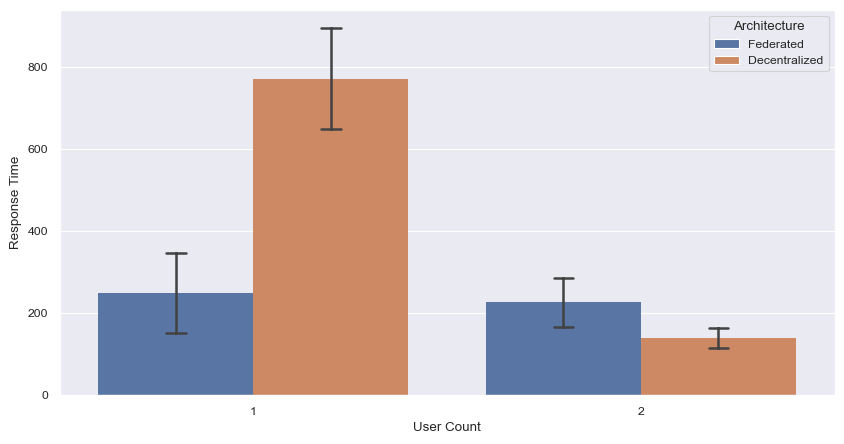

In [76]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df_plot_resptime, 
    x="User Count", 
    y="Response Time", 
    hue="Architecture",
    errorbar="sd",
    linestyle='', dodge=.5, capsize=.1)
plt.show()